<a href="https://colab.research.google.com/github/vilmarprado/mack_ling_prog_cie_dados/blob/main/LP_T4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<br>
<br>

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1>
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1>

# Exercício T4

##Vilmar Prado do Nascimento
<br>
<br>
https://github.com/vilmarprado/mack_ling_prog_cie_dados/blob/main/LP_T4.ipynb
---


# Analise dados do mercado de trabalho



<img src="https://www.glassdoor.com/about-us//app/uploads/sites/2/2018/06/Group-7.png" width=300>  



Aqui você vai empregar uma base de dados da [glassdoor](https://www.glassdoor.com/about/) com informações reais do mercado de trabalho de 1000 funcionários de uma empresa. Empregue esses dados, e o que você aprendeu sobre `Python` e as  bibliotecas `Pandas`, `Matplotlib` e `Seaborn`, para implementar uma análise de dados trazendo *insights* sobre esses para a empresa.

Por **exemplo**, se o nosso dataset fosse sobre despesas em um grande restaurante como abaixo.

In [ ]:
#@markdown
import seaborn as sns

xyz = sns.load_dataset('tips')
xyz.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Você poderia buscar *insights* sobre se o restaurante tem uma receita maior com clientes fumantes, ou ainda se mesas com fumantes são em média mesas com maior número de lugares, para tomar decisões quanto a onde construir uma nova área reservada para fumantes. Você poderia também fazer um gráfico de para verificar a distribuição do tamanho de mesas ao longo dos dias da semana para tomar uma decisão sobre a organização do espaço do restaurante. Essas análises você pode facilmente construir a partir de seleções e visualizações dos dados em `Python`.

Empregue a base `glassdoor` a seguir e **implemente**:

1. **Ao menos duas seleções de dados; e**

2. **Uma visualização (um gráfico)**

que tragam *insights* valiosos e relevantes para a empresa. **Para cada uma faça um pequeno parágrafo, 4-5 linhas, compartilhando sua análise e conclusões**.

In [1]:
import pandas as pd

data = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## Referências úteis para este Lab

Você pode acessar soluções na internet, mas tenha certeza de que os códigos que encontrar façam sentido para você.

Você também pode achar útil e fácil consultar, além das notas de aula as seguintes referências:

* [Basic Python Tutorial](https://www.w3schools.com/python/)
* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


# Seu Código aqui.

Mostra as Cinco maiores rendas

In [2]:
# Seu código
data.nlargest(5,'income')


,jobtitle,gender,age,performance,education,department,seniority,income,bonus
927,Manager,Male,58,1,PhD,Management,4,179726,4284
353,Manager,Male,59,4,PhD,Sales,5,176789,6773
609,IT,Male,65,4,Masters,Sales,5,165229,6506
799,Manager,Male,55,1,High School,Management,5,163208,4095
357,Manager,Female,60,4,PhD,Management,3,160614,8354


Mostra as cinco menores renda

In [3]:
data.nsmallest(5,'income')

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
465,Marketing Associate,Female,18,3,High School,Engineering,2,34208,6620
348,Marketing Associate,Female,22,4,PhD,Operations,1,36548,8090
824,Marketing Associate,Female,26,1,High School,Management,1,36585,4373
949,Graphic Designer,Male,30,1,College,Operations,2,36642,4388
590,Marketing Associate,Female,41,3,High School,Administration,2,36972,7058


Mostra a renda média entre homens e mulheres

In [5]:
sal_medio_mulheres = data[data.gender=='Female']['income'].mean()
sal_medio_homens = data[data.gender=='Male']['income'].mean()

print('Sal Med Mulheres', sal_medio_mulheres, 'Sal Med Homens', sal_medio_homens)

Sal Med Mulheres 89942.81837606838 Sal Med Homens 98457.54511278195


Agrupa por sexo, grau de educação e conta numero de pessoas

In [6]:
data_agrup = data.groupby(['gender','education'], as_index=False).jobtitle.count()
data_agrup.columns = ['gender','education','count']
data_agrup

,gender,education,count
0,Female,College,123
1,Female,High School,132
2,Female,Masters,107
3,Female,PhD,106
4,Male,College,118
5,Male,High School,133
6,Male,Masters,149
7,Male,PhD,132


Retira index do agrupamento sexo e educação

In [7]:
df = data.groupby(['gender','education'], as_index=False).jobtitle.count()
df.columns = ['gender','education','count']
df_pivot_x = pd.pivot_table(df, index='gender', columns='education', values='count').reset_index()

df_pivot = df_pivot_x.set_index('gender')
df_pivot

education,College,High School,Masters,PhD
gender,,,,
Female,123,132,107,106
Male,118,133,149,132


Cria grafico de quantidade de func por grau de instrução

<Axes: title={'center': 'Quantidade pessoas X gender education'}, xlabel='gender', ylabel='Count'>

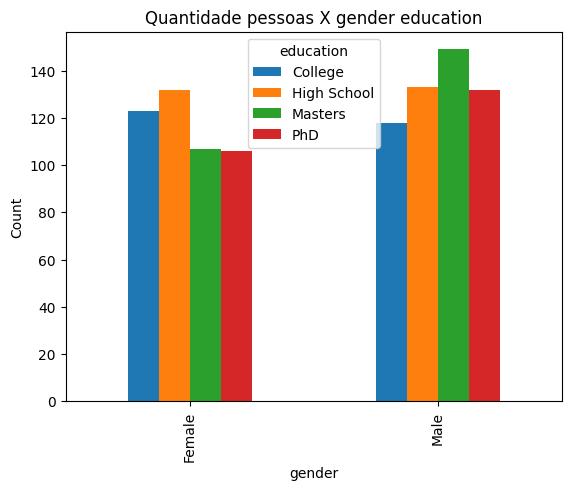

In [8]:
df_pivot.plot(kind='bar',ylabel = 'Count', title='Quantidade pessoas X gender education')

Agrupamento troca as linhas pelas colunas

In [9]:
data_agrup_pivot_x = pd.pivot_table(data_agrup,index = 'education', columns ='gender', values='count').reset_index()
#data_agrup_pivot_x
data_agrup_pivot = data_agrup_pivot_x.set_index('education')
data_agrup_pivot

gender,Female,Male
education,,
College,123,118
High School,132,133
Masters,107,149
PhD,106,132


Cria gráfico de barras qtd pessoas por educação e sexo

<Axes: title={'center': 'Gender Qtd pessoas X Education'}, xlabel='education', ylabel='Qtd'>

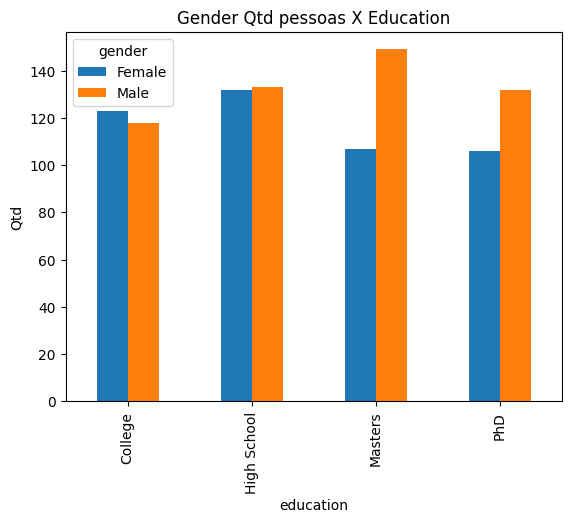

In [10]:
data_agrup_pivot.plot(kind='bar',ylabel='Qtd', title='Gender Qtd pessoas X Education')

Cria gráfico de linha quantidade de pessoa por sexo e educação

<Axes: title={'center': 'Qtd x education'}, xlabel='education', ylabel='Qtd'>

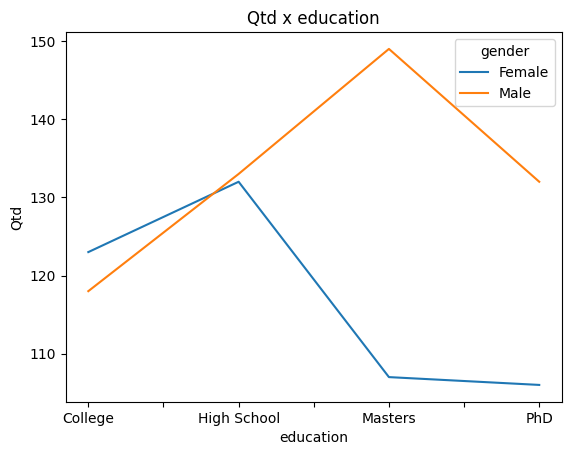

In [11]:
data_agrup_pivot.plot(ylabel='Qtd', title = 'Qtd x education')

Agrupa por sexo e educação para média de renda

In [12]:
df_agrup = data.groupby(['gender','education'], as_index = False).income.mean()
df_agrup_pivot_x = pd.pivot_table(df_agrup,index = 'education', columns ='gender', values='income').reset_index()
df_agrup_pivot = df_agrup_pivot_x.set_index('education')
df_agrup_pivot


gender,Female,Male
education,,
College,86286.642276,98214.008475
High School,86027.053030,91417.203008
Masters,92537.803738,101227.610738
PhD,96442.132075,102642.113636


Agrupa por cargo e sexi para média de renda

In [13]:
df2 = data.groupby(['gender','jobtitle'], as_index=False).income.mean()
df2

,gender,jobtitle,income
0,Female,Data Scientist,95704.792453
1,Female,Driver,86867.630435
2,Female,Financial Analyst,95458.326531
3,Female,Graphic Designer,92243.291667
4,Female,IT,90475.720000
5,Female,Manager,127252.277778
6,Female,Marketing Associate,76119.177570
7,Female,Sales Associate,91894.209302
8,Female,Software Engineer,94701.000000
9,Female,Warehouse Associate,92428.260870


troca linha por coluna cargo sexo e renda

In [14]:
df2_pivot_x = pd.pivot_table(df2,index = 'jobtitle', columns ='gender', values='income').reset_index()
df2_pivot = df2_pivot_x.set_index('jobtitle')
df2_pivot

gender,Female,Male
jobtitle,,
Data Scientist,95704.792453,89222.629630
Driver,86867.630435,91952.666667
Financial Analyst,95458.326531,94607.034483
Graphic Designer,92243.291667,89595.800000
IT,90475.720000,91021.978261
Manager,127252.277778,124848.930556
Marketing Associate,76119.177570,81881.818182
Sales Associate,91894.209302,94663.117647
Software Engineer,94701.000000,106371.485149


Cria gráfico de linha pos sexo cargo e Renda

<Axes: xlabel='jobtitle'>

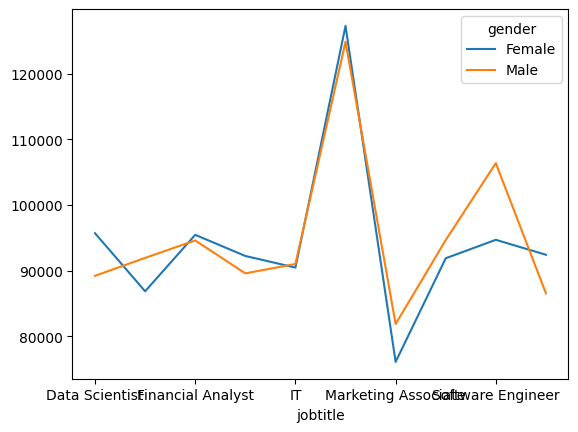

In [15]:
df2_pivot.plot()

Cria gráfico de barras por cargo sexo e renda

<Axes: xlabel='jobtitle'>

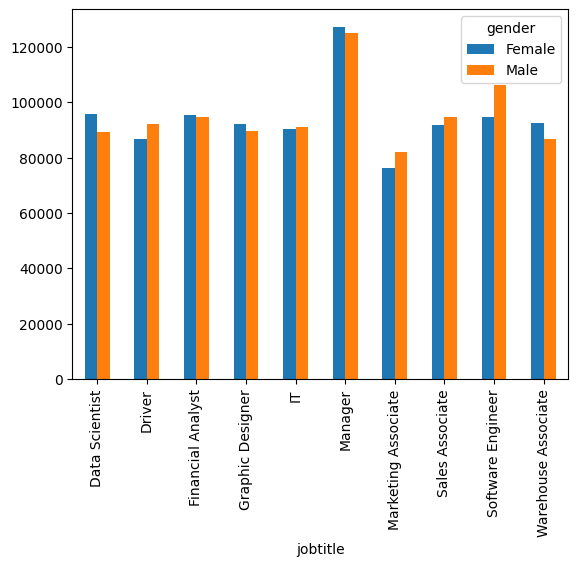

In [16]:
df2_pivot.plot(kind = 'bar')

Agrupa por cargo sexo para a quantidade de pessoas

In [17]:
from sqlalchemy import column
df1 = data.groupby(['gender','jobtitle'], as_index=False).education.count()
df1.columns = ['gender','jobtitle','count']
#data_agrup = data.groupby(['gender','education'], as_index=False).jobtitle.count()
df1
df1_p = pd.pivot_table(df1,index = 'jobtitle', columns ='gender', values='count').reset_index()
#       pd.pivot_table(data_agrup,index = 'education', columns ='gender', values='count').reset_index()
#a = plt.axes()
df1_p
df1_s = df1_p.set_index('jobtitle')
df1_s

gender,Female,Male
jobtitle,,
Data Scientist,53,54
Driver,46,45
Financial Analyst,49,58
Graphic Designer,48,50
IT,50,46
Manager,18,72
Marketing Associate,107,11
Sales Associate,43,51
Software Engineer,8,101


Cria gráfico de linhas contar pessoas ´por cargo e sexo

<Axes: xlabel='jobtitle'>

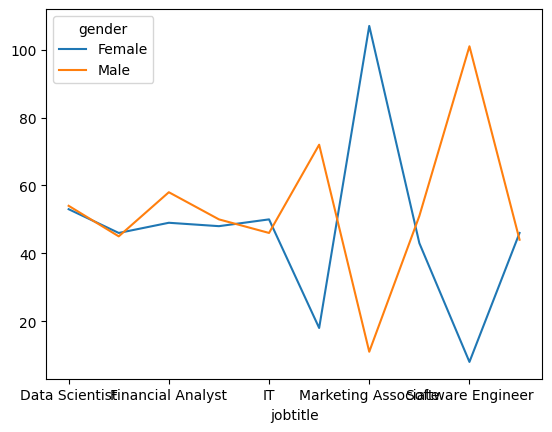

In [18]:
df1_s.plot()

Cria gráfico de barras para quantidade de pessoas por cargo e sexo


<Axes: xlabel='jobtitle'>

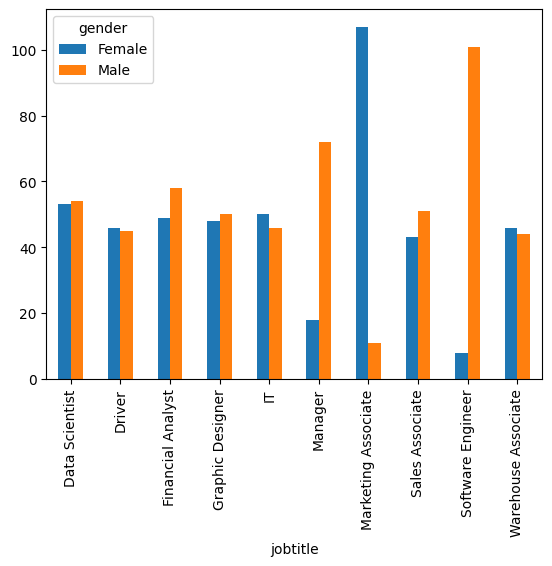

In [19]:
df1_s.plot(kind = 'bar')

Agrupa por cargo e sexo para média de bonus

In [20]:

df3 = data.groupby(['gender','jobtitle'], as_index=False).bonus.mean()
df3

,gender,jobtitle,bonus
0,Female,Data Scientist,6747.471698
1,Female,Driver,6329.717391
2,Female,Financial Analyst,6285.326531
3,Female,Graphic Designer,6567.125000
4,Female,IT,6362.220000
5,Female,Manager,5992.000000
6,Female,Marketing Associate,6131.971963
7,Female,Sales Associate,6326.325581
8,Female,Software Engineer,6446.375000
9,Female,Warehouse Associate,7655.673913


Troca linha por coluna cargo, sexo para ver média de bonus

In [21]:
df3_pivot_x = pd.pivot_table(df3,index = 'jobtitle', columns ='gender', values='bonus').reset_index()
df3_pivot = df3_pivot_x.set_index('jobtitle')
df3_pivot

gender,Female,Male
jobtitle,,
Data Scientist,6747.471698,6227.370370
Driver,6329.717391,6465.133333
Financial Analyst,6285.326531,6509.327586
Graphic Designer,6567.125000,6988.280000
IT,6362.220000,6217.608696
Manager,5992.000000,6080.222222
Marketing Associate,6131.971963,6279.818182
Sales Associate,6326.325581,6230.431373
Software Engineer,6446.375000,6662.326733


Cria gráfico de linhas por cargo sexo e média de bonus

<Axes: xlabel='jobtitle'>

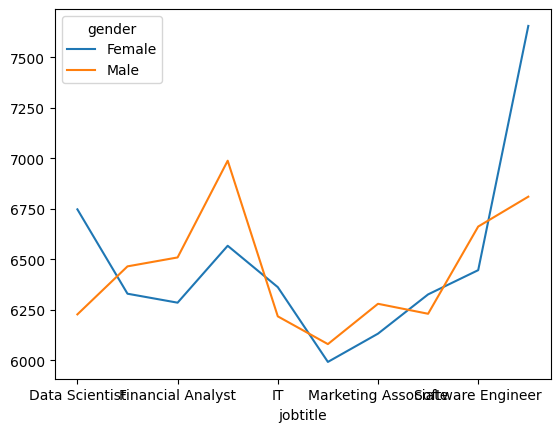

In [22]:
df3_pivot.plot()

Cria gráfico de barras para comparar sexo cargo e média de bonus

<Axes: xlabel='jobtitle'>

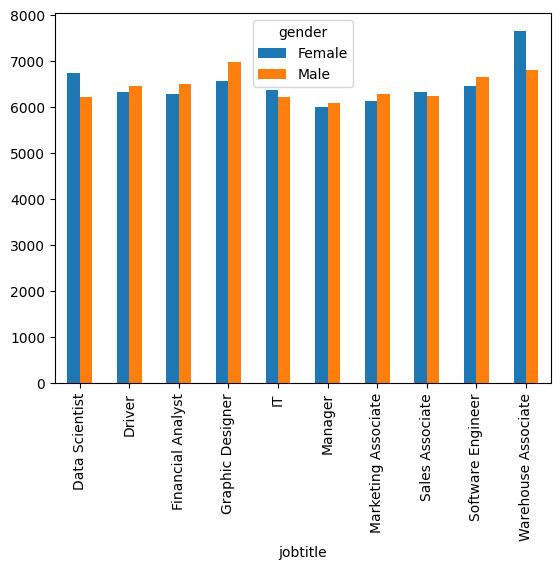

In [23]:
df3_pivot.plot(kind='bar')

Agrupa por sexo e antiguidade para número de pessoas

In [24]:
df5 = data.groupby(['gender','seniority'], as_index=False).jobtitle.count()
df5.columns = ['gender','seniority','count']
df5

,gender,seniority,count
0,Female,1,83
1,Female,2,102
2,Female,3,106
3,Female,4,80
4,Female,5,97
5,Male,1,112
6,Male,2,107
7,Male,3,113
8,Male,4,104
9,Male,5,96


troca linha por coluna por sexo senioridade para número de pessoas

In [25]:
df5_pivot_x = pd.pivot_table(df5,index = 'seniority', columns ='gender', values='count').reset_index()
df5_pivot = df5_pivot_x.set_index('seniority')
df5_pivot

gender,Female,Male
seniority,,
1,83,112
2,102,107
3,106,113
4,80,104
5,97,96


Cria grafico de barras comparando sexo e senioridade em número de pessoas

<Axes: xlabel='seniority', ylabel='quntidade'>

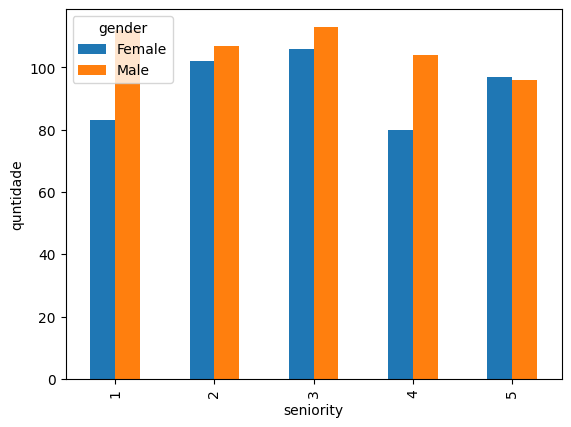

In [30]:
df5_pivot.plot(kind='bar',ylabel ='quntidade', label='Numero de funcionários por Sexo X Seniority')

Agrupa por sexo educação para média de idade

In [28]:
df_age = data.groupby(['gender','education'], as_index=False).age.mean()
df_age.columns = ['gender','education','age']
df_age

,gender,education,age
0,Female,College,41.674797
1,Female,High School,41.045455
2,Female,Masters,41.728972
3,Female,PhD,43.084906
4,Male,College,40.533898
5,Male,High School,41.180451
6,Male,Masters,41.409396
7,Male,PhD,40.810606


troca linhas por colunas instrução sexo e idade sem index

In [31]:
df_age_pvt_x = pd.pivot_table(df_age,index = 'education', columns ='gender', values='age').reset_index()
df_age_pvt = df_age_pvt_x.set_index('education')
df_age_pvt

gender,Female,Male
education,,
College,41.674797,40.533898
High School,41.045455,41.180451
Masters,41.728972,41.409396
PhD,43.084906,40.810606


mostra instrução sexo com index

In [32]:
df_age_pvt_x

gender,education,Female,Male
0,College,41.674797,40.533898
1,High School,41.045455,41.180451
2,Masters,41.728972,41.409396
3,PhD,43.084906,40.810606


Cria gráficos de linha e coluna comparando médi de idade e instrução

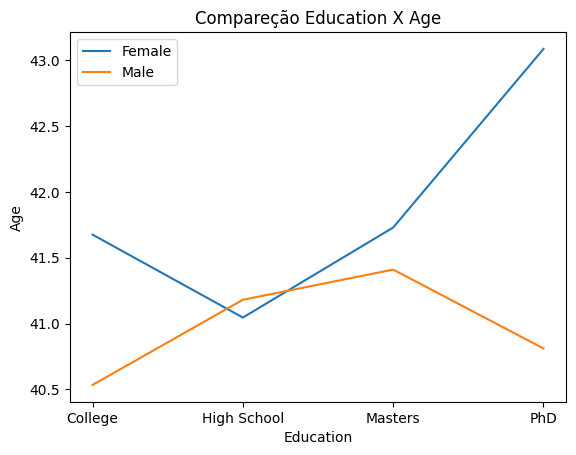

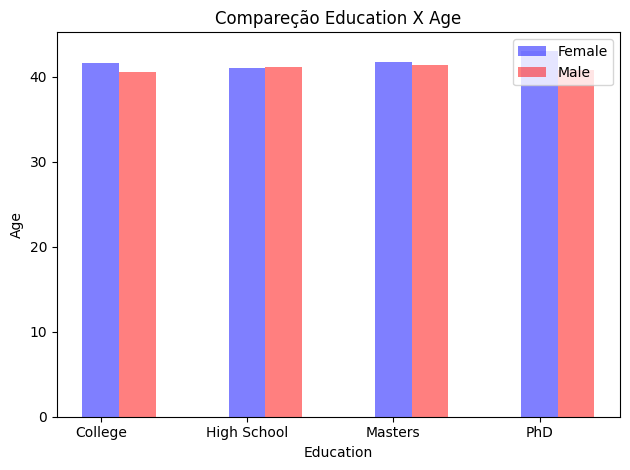

In [33]:
import numpy as np
import matplotlib.pyplot as plt

df_age_Female=df_age_pvt_x['Female']
df_age_Male  =df_age_pvt_x['Male']
fig, ax = plt.subplots()

ax = plt.subplot(1,1,1)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax = plt.title('Compareção Education X Age')

ax = plt.plot(df_age_pvt_x.education,df_age_pvt_x.Female,  label = 'Female')
ax = plt.plot(df_age_pvt_x.education,df_age_pvt_x.Male,   label = 'Male' )
ax = plt.legend()
az = plt.subplots()
plt.subplot(1,1,1)
X = np.arange( len(df_agrup_pivot_x.education))
az = plt.bar(df_age_pvt_x.education,df_age_pvt_x.Female, color= 'blue', alpha =0.5, width=0.25, label = 'Female')
az = plt.bar(X+0.25,df_age_pvt_x.Male,  color='r', alpha = 0.5, width=0.25, label = 'Male'    )
az = plt.legend()
az = plt.subplot(1,1,1)
az.set_xlabel('Education')
az.set_ylabel('Age')
az = plt.title('Compareção Education X Age')


plt.tight_layout()
plt.show()

Agrupa por sexo cargo para média de idade

In [34]:
df_job = data.groupby(['gender','jobtitle'], as_index=False).age.mean()
df_job.columns = ['gender','jobtitle','age']
df_job
df_job_pvt_x = pd.pivot_table(df_job,index = 'jobtitle', columns ='gender', values='age').reset_index()
df_job_pvt = df_job_pvt_x.set_index('jobtitle')
df_job_pvt

gender,Female,Male
jobtitle,,
Data Scientist,43.000000,39.796296
Driver,42.021739,42.333333
Financial Analyst,40.734694,40.844828
Graphic Designer,41.187500,40.180000
IT,42.900000,41.413043
Manager,44.611111,42.013889
Marketing Associate,42.121495,37.090909
Sales Associate,42.186047,42.588235
Software Engineer,37.000000,41.178218


Cria gráfico de linha para comparar média de idade por sexo e cargo

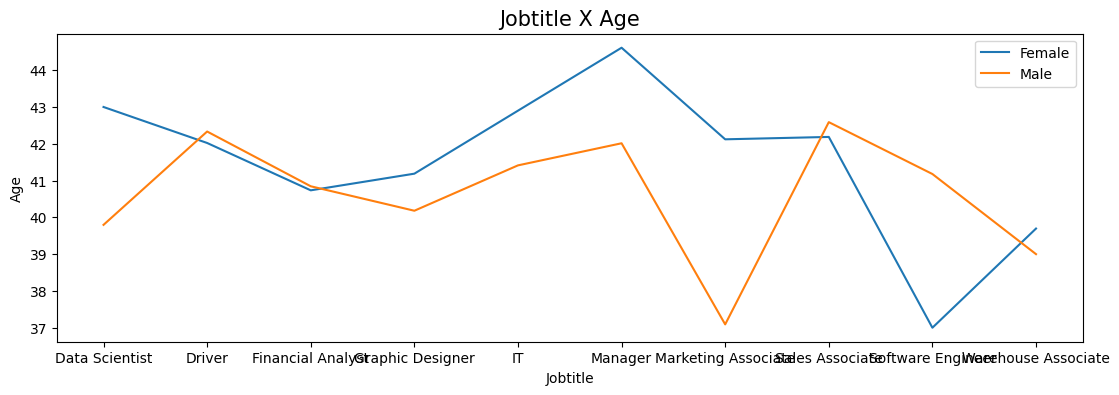

In [35]:
plt.figure(figsize=(45,4))
df_age_Female=df_job_pvt_x['Female']
df_age_Male  =df_job_pvt_x['Male']
width = 0.35
plt.subplot(1,3,1)
plt.title('Jobtitle X Age', fontsize=15)
plt.xlabel('Jobtitle')
plt.ylabel('Age')

plt.plot(df_job_pvt_x.jobtitle,df_job_pvt_x.Female,  label = 'Female')
plt.plot(df_job_pvt_x.jobtitle,df_job_pvt_x.Male,   label = 'Male'    )
plt.legend()


Cinco pessoas com maior idade

In [36]:
data.nlargest(5,'age')

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
286,IT,Female,65,5,Masters,Administration,4,121210,7949
298,Graphic Designer,Female,65,5,High School,Operations,4,130251,7750
308,Graphic Designer,Male,65,5,Masters,Operations,5,116751,8505
350,Software Engineer,Male,65,4,High School,Management,5,157852,6669
374,Software Engineer,Male,65,5,Masters,Sales,1,134758,7500


Cinco pessoas com menor idade

In [37]:
data.nsmallest(5,'age')

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240
11,Driver,Female,18,5,College,Management,3,62759,10124
50,Sales Associate,Male,18,4,Masters,Operations,5,90780,9353
51,Software Engineer,Male,18,4,Masters,Operations,4,89474,9104


Cria gráfico de barras com a média de renda sexo e educação

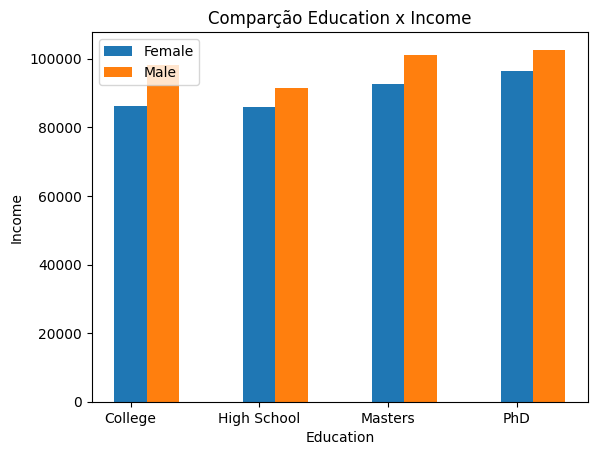

In [38]:
from ctypes import LittleEndianStructure
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_title('Título')

x = np.arange( len(df_agrup_pivot_x.education))

ax = plt.bar( df_agrup_pivot_x.education,df_agrup_pivot_x.Female,width=0.25, label='Female')
ax = plt.bar(x+0.25, df_agrup_pivot_x.Male, width=0.25, label = 'Male')
ax = plt.legend()

ax = plt.title('Comparção Education x Income')
plt.show()

Agrupa cargo senioridade

In [39]:
df_agrup_sen = data.groupby(['jobtitle','seniority'], as_index=False).age.count()
#df_agrup_sen.columns = ['seniority','jobtitle']
df_agrup_sen
df_agrup_sen_x = pd.pivot_table(df_agrup_sen, index = 'jobtitle', columns ='seniority', values='age').reset_index()
df_agrup_sen = df_agrup_sen_x.set_index('jobtitle')
df_agrup_sen


seniority,1,2,3,4,5
jobtitle,,,,,
Data Scientist,18,27,27,12,23
Driver,12,28,17,21,13
Financial Analyst,21,22,22,26,16
Graphic Designer,19,16,17,27,19
IT,21,18,25,16,16
Manager,19,19,20,15,17
Marketing Associate,25,20,28,15,30
Sales Associate,17,19,26,14,18
Software Engineer,27,19,20,21,22


cria gráfico

<Axes: xlabel='jobtitle'>

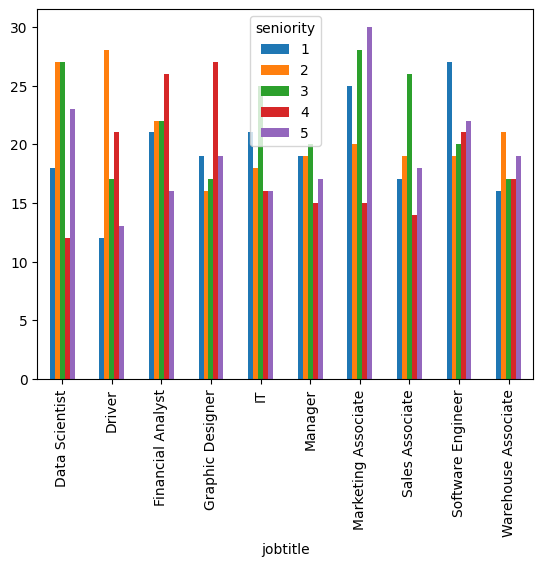

In [40]:
df_agrup_sen.plot(kind = 'bar')

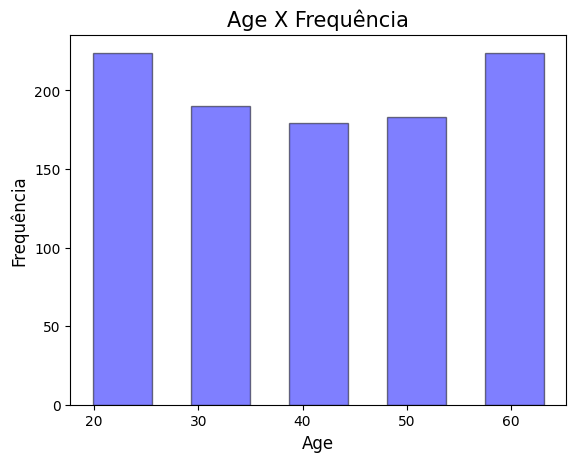

In [41]:
plt.title('Age X Frequência',fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequência',fontsize=12)
plt.tick_params(labelsize=10)
plt.hist(data['age'], 5, rwidth=0.6,color='blue',alpha=0.5, edgecolor='black')
plt.show()

<Axes: >

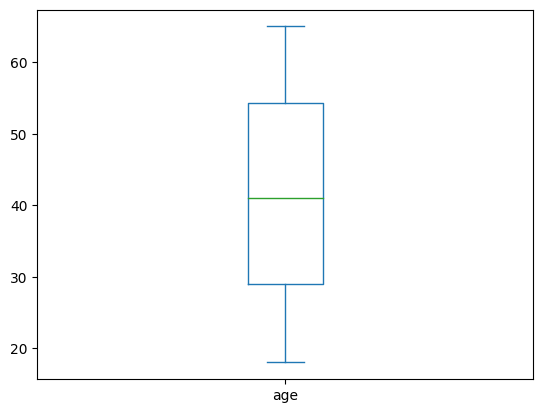

In [42]:
data['age'].plot(kind='box')